<a href="https://colab.research.google.com/github/ASchurNU/test_colab_integration/blob/main/CCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Load Required Libraries (install if not available already)
if (!require("CCA")) install.packages("CCA")
library(CCA)
library(ggplot2)

Loading required package: CCA

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘CCA’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pracma’, ‘pcaPP’, ‘hdrcde’, ‘colorspace’, ‘ks’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘dotCall64’, ‘fds’, ‘deSolve’, ‘spam’, ‘maps’, ‘fda’, ‘fields’




In [ ]:
# Step 2: Load the Dataset
data(iris)

# Create two sets of variables for CCA (example)
set1 <- iris[, 1:2] # Sepal.Length and Sepal.Width
set2 <- iris[, 3:4] # Petal.Length and Petal.Width



In [ ]:
# Step 3: Compute Canonical Correlations
cca_result <- cc(set1, set2)


In [ ]:
# Step 4: Extract Canonical Correlations
correlations <- cca_result$cor
print(paste("Canonical Correlations:", correlations))


[1] "Canonical Correlations: 0.940968996975749"
[2] "Canonical Correlations: 0.123936881205404"


In [ ]:
# Step 5: Calculate canonical variables
X_canon <- as.matrix(scale(set1)) %*% cca_result$xcoef
Y_canon <- as.matrix(scale(set2)) %*% cca_result$ycoef

# The canonical coefficients (weights) indicate how much each original variable contributes to the canonical variables
coef1 <- cca_result$xcoef
coef2 <- cca_result$ycoef
print("Canonical Coefficients (Set 1):")
print(coef1)
print("Canonical Coefficients (Set 2):")
print(coef2)


[1] "Canonical Coefficients (Set 1):"
                   [,1]      [,2]
Sepal.Length -1.0689812 0.5797395
Sepal.Width   0.8549914 2.1462750
[1] "Canonical Coefficients (Set 2):"
                   [,1]      [,2]
Petal.Length -0.8491249 -1.918708
Petal.Width   0.6938022  4.809531


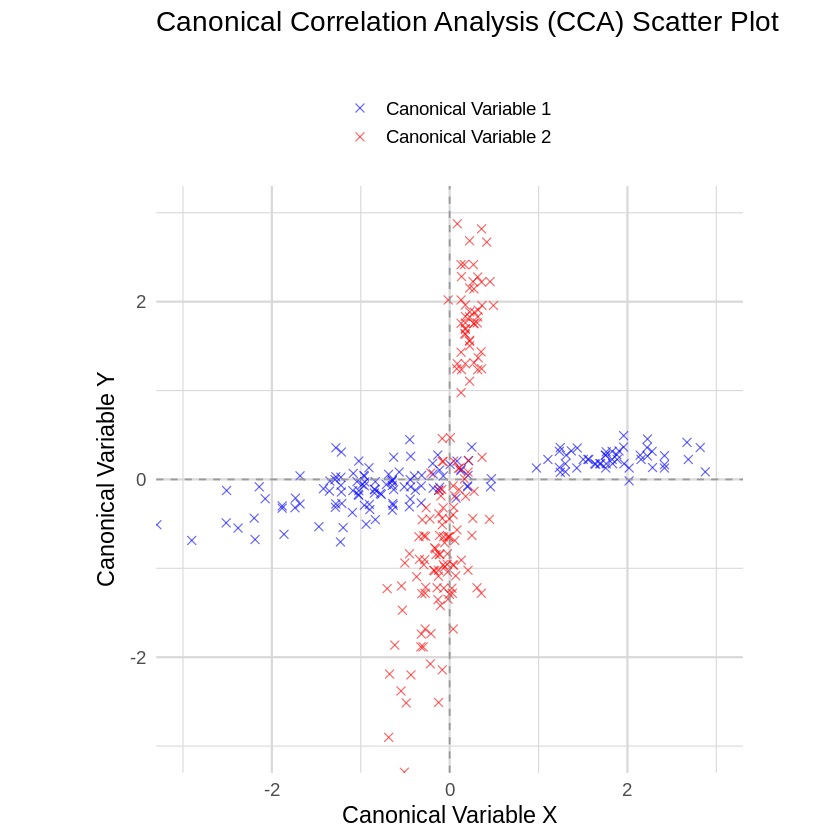

In [ ]:
# Step 6: Plot results
df_plot <- data.frame(Canonical_X1 = X_canon[,1], Canonical_Y1 = Y_canon[,1])

ggplot() +
  geom_point(data = df_plot, aes(x = Canonical_X1, y = Canonical_Y1, color = "Canonical Variable 1"),
             shape = 4, size = 2, alpha = 0.6) +
  geom_point(data = df_plot, aes(x = Canonical_Y1, y = Canonical_X1, color = "Canonical Variable 2"),
             shape = 4, size = 2, alpha = 0.6) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray60") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray60") +
  labs(
    title = "Canonical Correlation Analysis (CCA) Scatter Plot",
    x = "Canonical Variable X",
    y = "Canonical Variable Y",
    color = ""
  ) +
  scale_color_manual(values = c(
    "Canonical Variable 1" = "blue",
    "Canonical Variable 2" = "red"
  )) +
  theme_minimal(base_size = 14) +
  theme(
    legend.position = "top",
    legend.direction = "vertical",
    legend.box = "horizontal",
    panel.grid = element_line(color = "gray85")
  ) +
  coord_fixed(xlim = c(-3, 3), ylim = c(-3, 3))


In [ ]:

# Step 7: Calculate canonical loadings (using comput function from CCA package)
loadings <- comput(set1, set2, cca_result)
loadings_set1 <- loadings$corr.X.xscores # Access the loadings for set1
loadings_set2 <- loadings$corr.Y.yscores # Access the loadings for set2

# Create data frames for loadings
loadings_df <- data.frame(
  PC1 = loadings_set1[, 1],
  PC2 = loadings_set1[, 2],
  Variables = rownames(loadings_set1)
)
print(loadings_df)
print(dim(loadings_set1))
print(dim(loadings_df))

loadings_df_set2 <- data.frame(
  PC1 = loadings_set2[, 1],
  PC2 = loadings_set2[, 2],
  Variables = rownames(loadings_set2)
)
print(loadings_df_set2)
print(dim(loadings_set2))
print(dim(loadings_df_set2))



                    PC1       PC2    Variables
Sepal.Length -0.9290009 0.3700774 Sepal.Length
Sepal.Width   0.4767332 0.8790480  Sepal.Width
[1] 2 2
[1] 2 3
                    PC1       PC2    Variables
Petal.Length -0.9897548 0.1427778 Petal.Length
Petal.Width  -0.9144533 0.4046915  Petal.Width
[1] 2 2
[1] 2 3


In [ ]:
# Step 8: Calculate and print redundancy indices
redundancy_x <- sum(cor(set1, cca_result$scores$xscores)^2) / ncol(set1)
redundancy_y <- sum(cor(set2, cca_result$scores$yscores)^2) / ncol(set2)

print(paste("Redundancy Index (Set 1 explaining Set 2):", redundancy_x))
print(paste("Redundancy Index (Set 2 explaining Set 1):", redundancy_y))

[1] "Redundancy Index (Set 1 explaining Set 2): 1"
[1] "Redundancy Index (Set 2 explaining Set 1): 1"


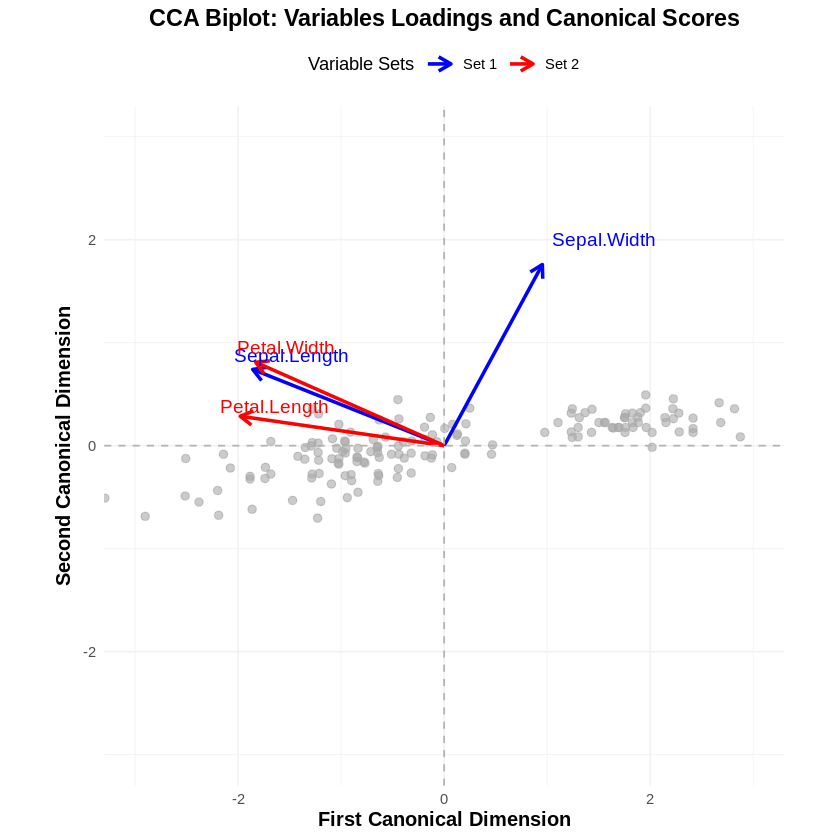

In [ ]:
# Step 9: Create a biplot for canonical variables and loadings
# Prepare the data for the biplot
biplot_df <- data.frame(
  Canonical_X1 = X_canon[,1],
  Canonical_Y1 = Y_canon[,1]
)

# Setting up the biplot
# First let's create a data frame for the loadings vectors
loadings_arrows_set1 <- data.frame(
  x = rep(0, nrow(loadings_set1)),
  y = rep(0, nrow(loadings_set1)),
  xend = loadings_set1[,1] * 2, # Scaling factor for visibility
  yend = loadings_set1[,2] * 2,
  Variable = rownames(loadings_set1)
)

loadings_arrows_set2 <- data.frame(
  x = rep(0, nrow(loadings_set2)),
  y = rep(0, nrow(loadings_set2)),
  xend = loadings_set2[,1] * 2, # Scaling factor for visibility
  yend = loadings_set2[,2] * 2,
  Variable = rownames(loadings_set2)
)

# Create the biplot
ggplot() +
  # Plot the canonical scores
  geom_point(data = biplot_df, aes(x = Canonical_X1, y = Canonical_Y1),
             color = "darkgrey", alpha = 0.6, size = 2) +

  # Add arrows for loadings from set 1
  geom_segment(data = loadings_arrows_set1,
               aes(x = x, y = y, xend = xend, yend = yend, color = "Set 1"),
               arrow = arrow(length = unit(0.3, "cm")), linewidth = 1) +

  # Add arrows for loadings from set 2
  geom_segment(data = loadings_arrows_set2,
               aes(x = x, y = y, xend = xend, yend = yend, color = "Set 2"),
               arrow = arrow(length = unit(0.3, "cm")), linewidth = 1) +

  # Add variable names
  geom_text(data = loadings_arrows_set1,
            aes(x = xend * 1.1, y = yend * 1.1, label = Variable),
            size = 4, hjust = 0, vjust = 0, color = "blue") +

  geom_text(data = loadings_arrows_set2,
            aes(x = xend * 1.1, y = yend * 1.1, label = Variable),
            size = 4, hjust = 0, vjust = 0, color = "red") +

  # Add reference lines
  geom_hline(yintercept = 0, linetype = "dashed", color = "grey70") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "grey70") +

  # Formatting
  labs(
    title = "CCA Biplot: Variables Loadings and Canonical Scores",
    x = "First Canonical Dimension",
    y = "Second Canonical Dimension",
    color = "Variable Sets"
  ) +
  scale_color_manual(values = c("Set 1" = "blue", "Set 2" = "red")) +
  theme_minimal() +
  theme(
    legend.position = "top",
    panel.grid = element_line(color = "grey95"),
    axis.title = element_text(size = 12, face = "bold"),
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5)
  ) +
  coord_fixed(ratio = 1, xlim = c(-3, 3), ylim = c(-3, 3)) # Equal scaling for x and y

In [ ]:
redundancy_x <- sum(cor(set1, cca_result$scores$xscores)^2) / ncol(set1)
redundancy_y <- sum(cor(set2, cca_result$scores$yscores)^2) /ncol(set2)

print(paste("Redundancy Index (Set 1 explaining Set 2):", redundancy_x))
print(paste("Redundancy Index (Set 2 explaining Set 1):", redundancy_y))

[1] "Redundancy Index (Set 1 explaining Set 2): 1"
[1] "Redundancy Index (Set 2 explaining Set 1): 1"


Redundancy index measures how ell each set explains the variance in the other set

Higher values (closer to 1) indicate that one set explains a significant portion of variance in the other set.

Lower values suggest that the sets are weakly related.